<h2>Training Sequential Models</h2>
Let us train a simple sequential neural network model on the MNIST dataset.

<h3>Step 1: Imports</h3>

In [11]:
import torch
from torchvision import datasets, transforms
from torch import nn
import matplotlib.pyplot as plt

<h3>Step 2: Loading the data</h3>

In [6]:
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])
trainset = datasets.MNIST('MNIST_data/', download=True, train=True, transform=transform)


0it [00:00, ?it/s]
 87%|███████████████████████████████████████████████████████████         | 8609792/9912422 [00:10<00:01, 932812.12it/s]


 99%|██████████████████████████████████████████████████████████████████ | 9764864/9912422 [00:11<00:00, 1104508.11it/s]

Extracting MNIST_data/MNIST\raw\train-images-idx3-ubyte.gz




0it [00:00, ?it/s]

  0%|                                                                                        | 0/28881 [00:00<?, ?it/s]

 57%|█████████████████████████████████████████▍                               | 16384/28881 [00:00<00:00, 64144.32it/s]

32768it [00:00, 42725.18it/s]                                                                                          

Extracting MNIST_data/MNIST\raw\train-labels-idx1-ubyte.gz




0it [00:00, ?it/s]

  0%|                                                                                      | 0/1648877 [00:00<?, ?it/s]

  1%|▋                                                                      | 16384/1648877 [00:00<00:32, 50219.18it/s]

  3%|██                                                                     | 49152/1648877 [00:01<00:25, 62637.73it/s]

  6%|████▏                                                                  | 98304/1648877 [00:01<00:19, 78602.45it/s]

 10%|██████▉                                                               | 163840/1648877 [00:01<00:14, 99261.49it/s]

 14%|█████████▌                                                           | 229376/1648877 [00:01<00:11, 121709.27it/s]

 23%|████████████████                                                     | 385024/1648877 [00:02<00:07, 160321.39it/s]

 35%|████████████████████████▎                                            | 581632/1648877 [00:02<00:05, 208666.32it/s]

 47%|█████

Extracting MNIST_data/MNIST\raw\t10k-images-idx3-ubyte.gz




0it [00:00, ?it/s]

  0%|                                                                                         | 0/4542 [00:00<?, ?it/s]

8192it [00:00, 14235.84it/s]                                                                                           

Extracting MNIST_data/MNIST\raw\t10k-labels-idx1-ubyte.gz
Processing...
Done!



9920512it [00:28, 1104508.11it/s]                                                                                      

In [9]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

<h3>Step 3: Visualizing our data</h3>

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


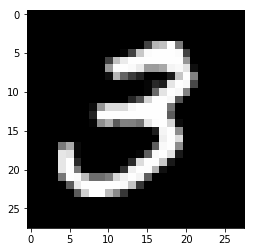

In [16]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)
plt.imshow(images[1].numpy().squeeze(), cmap='Greys_r');

<h3>Step 4: Set hyperparameters</h3>

In [20]:
input_size = 784
hidden_sizes = [128, 64]
output_size = 10
learning_rate = 0.03
epochs=5

<h3>Step 5: Defining the model</h3>

In [21]:
from torch import optim
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

<h3>Step 6: Training the model</h3>

In [22]:
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        #flatten
        images = images.view(images.shape[0], -1)
    
        optimizer.zero_grad()
        output = model.forward(images)
        loss = criterion(output, labels)
        loss.backward()
        running_loss += loss.item()
        optimizer.step()
        
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 0.6001399611549845
Training loss: 0.2771080797200582
Training loss: 0.21069412981507493
Training loss: 0.16802556856449988
Training loss: 0.139167630107704


<h3>Step 7: Taking the model out for a spin</h3>

torch.return_types.topk(
values=tensor([[0.9154]]),
indices=tensor([[2]]))


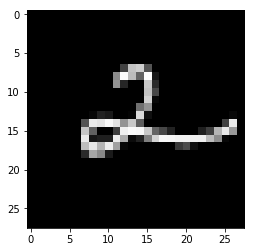

In [39]:
images, labels = next(iter(trainloader))

img = images[0].view(1, 784)
with torch.no_grad():
    logits = model.forward(img)

ps = torch.softmax(logits, dim=1)
plt.imshow(images[0].view(28,28), cmap='Greys_r');
print(ps.topk(1,dim=1))